# Interpretability

### Preambula
To get started you need to install glasses, this can be done through `pip`

```bash
pip install git+https://github.com/FrancescoSaverioZuppichini/glasses
```

## Interpretability

There are different methods to understand the model's output. In glasses, each model is a `VisionModule` instance and they all implement the `Interpretable` protocol allowing you to access the `.interpret` method.

All the available interpretability techniques are contained in `glasses.interpretability`. Let's see them in action!

First of all, we need an image!

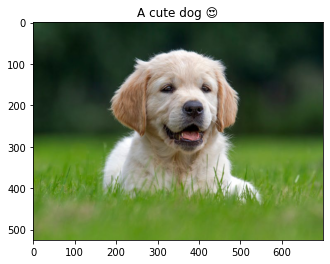

In [7]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

r = requests.get('https://i.insider.com/5df126b679d7570ad2044f3e?width=700&format=jpeg&auto=webp')
im = Image.open(BytesIO(r.content))

fig = plt.figure()
plt.title('A cute dog 😍')
plt.imshow(im)

Then we can create a model using `AutoModel`, a simple `resnet18` will do just fine.

In [17]:
from glasses.models import AutoModel, AutoConfig

model = AutoModel.from_pretrained('resnet18')
cfg = AutoConfig.from_name('resnet18')

INFO:root:Loaded resnet18 pretrained weights.


Then, let's import the interpretability methods we would like to apply. So far I have [Grad-Cam](https://arxiv.org/abs/1610.02391) and [Saliency Map](https://arxiv.org/abs/1312.6034) implemented

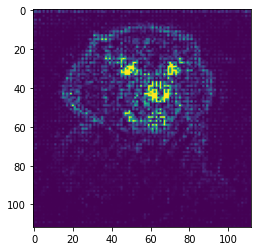

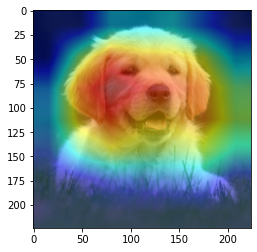

In [18]:
from glasses.interpretability import GradCam, SaliencyMap
from torchvision.transforms import Normalize
# use config to correctly preprocess the picture and add the batch dim
x =  cfg.transform(im).unsqueeze(0)
# you just need to instance an interpretability class and pass it to .interpret
_ = model.interpret(x, using=SaliencyMap()).show()
# in the Grad-Cam case we also want to post process the image by inverting the ImageNet preprocessing
postprocessing = Normalize(-cfg.mean / cfg.std, (1.0 / cfg.std))
_ = model.interpret(x, using=GradCam(), postprocessing=postprocessing).show()

Tada!